In [42]:
import pandas as pd
import numpy as np

df = pd.read_csv("gender_submission.csv")
print(df.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [43]:
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")
print(df1.columns)
print(df2.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [44]:
df_merged = pd.concat([df1, df2]).drop_duplicates().reset_index(drop=True)

print(df_merged.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [45]:
#Traitement des données
#Suppression des colones inutiles
df_merged = df_merged.drop(['PassengerId', 'Cabin', 'Embarked', 'Name', 'Ticket'], axis=1)

In [46]:
#suppression des lignes avec données manquantes
df_merged = df_merged.dropna(axis=0)

In [47]:
df_merged.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


EXERCICE
- Nombre de passagers par classe
- Moyenne d’âge des survivants vs non-survivants
- Matrice de corrélation des variables numériques

In [48]:
passagers_par_classe = df_merged.groupby("Pclass").size()
print(passagers_par_classe)

Pclass
1    186
2    173
3    355
dtype: int64


In [49]:
#Moyenne d'âge des survivants et non survivants

moyenne_age_survivants = df_merged[df_merged['Survived'].isin([1])]['Age'].mean()
moyenne_age_non_survivants = df_merged[df_merged['Survived'].isin([0])]['Age'].mean()

print(moyenne_age_non_survivants)
print(moyenne_age_survivants)

30.62617924528302
28.343689655172415


<Axes: xlabel='Pclass'>

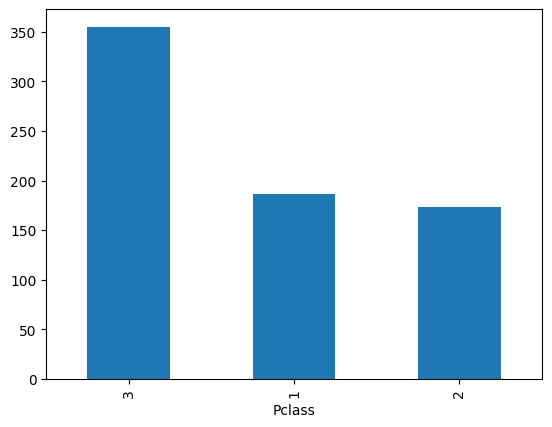

In [50]:
#Nombre de personnes par classes 
df_merged['Pclass'].value_counts()

#En graphique
df_merged['Pclass'].value_counts().plot.bar()

In [51]:
#Feature engineering = création de nouvelles classes d'âge

df_merged['passagers_moins_20_ans'] = (df_merged['Age'] < 20).astype(int)
df_merged['passagers_entre_20_30'] = ((df_merged['Age'] >= 20) & (df_merged['Age'] < 30)).astype(int)
df_merged['passagers_entre_30_40'] = ((df_merged['Age'] >= 30) & (df_merged['Age'] < 40)).astype(int)
df_merged['passagers_plus_40'] = (df_merged['Age'] >= 40).astype(int)


# Affichage des valeurs uniques pour ces colonnes
df_merged[['passagers_moins_20_ans', 'passagers_entre_20_30', 'passagers_entre_30_40', 'passagers_plus_40']].apply(pd.Series.value_counts)

,passagers_moins_20_ans,passagers_entre_20_30,passagers_entre_30_40,passagers_plus_40
0,550,494,547,551
1,164,220,167,163


In [52]:
#Sexe = transformation des string en integer avec map
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

In [53]:
# Créer une nouvelle colonne "FamilySize" (nombre de proches à bord)
df_merged["FamilySize"] = df_merged["SibSp"] + df_merged["Parch"] + 1

# Identifier si une personne voyageait seule
df_merged["IsAlone"] = (df_merged["FamilySize"] == 1).astype(int)


In [54]:
df_numeric = df_merged.select_dtypes(include=['int', 'float'])
matrice_corr = df_numeric.corr()

print(matrice_corr)

                        Survived    Pclass       Sex       Age     SibSp  \
Survived                1.000000 -0.359653  0.538826 -0.077221 -0.017358   
Pclass                 -0.359653  1.000000 -0.155460 -0.369226  0.067247   
Sex                     0.538826 -0.155460  1.000000 -0.093254  0.103950   
Age                    -0.077221 -0.369226 -0.093254  1.000000 -0.308247   
SibSp                  -0.017358  0.067247  0.103950 -0.308247  1.000000   
Parch                   0.093317  0.025683  0.246972 -0.189119  0.383820   
Fare                    0.268189 -0.554182  0.184994  0.096067  0.138329   
passagers_moins_20_ans  0.083997  0.191520  0.104058 -0.666551  0.354535   
passagers_entre_20_30  -0.076315  0.169934 -0.053036 -0.237445 -0.136378   
passagers_entre_30_40   0.034836 -0.081082 -0.007188  0.160287 -0.094740   
passagers_plus_40      -0.035361 -0.297092 -0.038691  0.767531 -0.109731   
FamilySize              0.042787  0.056909  0.207165 -0.301914  0.847354   
IsAlone     

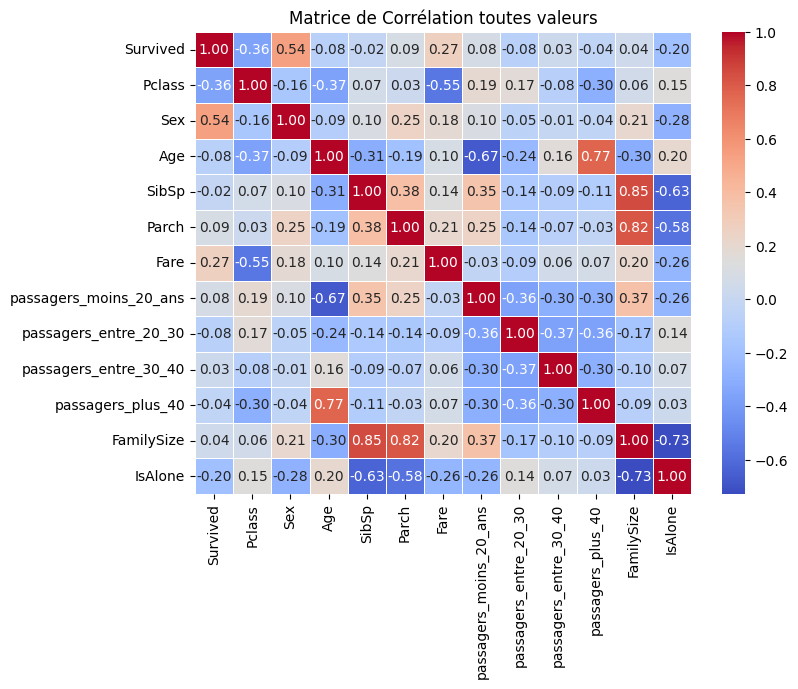

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Taille de la figure
sns.heatmap(matrice_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)

# Afficher le graphique
plt.title("Matrice de Corrélation toutes valeurs")
plt.show()

In [56]:
corr_survived = df_numeric.corr()['Survived']
print(corr_survived)

Survived                  1.000000
Pclass                   -0.359653
Sex                       0.538826
Age                      -0.077221
SibSp                    -0.017358
Parch                     0.093317
Fare                      0.268189
passagers_moins_20_ans    0.083997
passagers_entre_20_30    -0.076315
passagers_entre_30_40     0.034836
passagers_plus_40        -0.035361
FamilySize                0.042787
IsAlone                  -0.196140
Name: Survived, dtype: float64


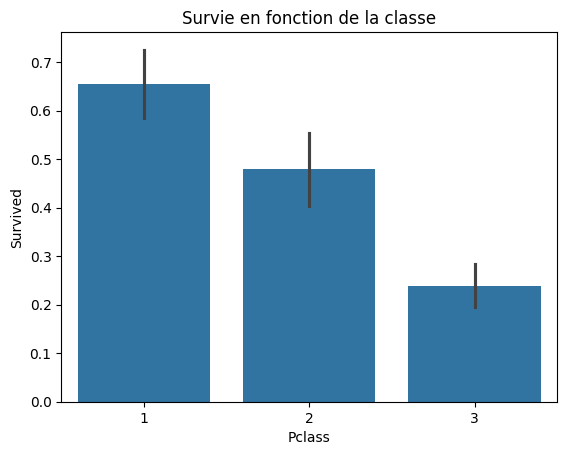

In [57]:
sns.barplot(x="Pclass", y="Survived", data=df_merged)
plt.title("Survie en fonction de la classe")
plt.show()


Prédictions

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Séparer features (X) et target (y)
X = df_merged.drop("Survived", axis=1)
y = df_merged["Survived"]

# Séparer en train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner un modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth = 10)
model.fit(X_train, y_train)

# Prédire et évaluer
y_pred = model.predict(X_test)
print(f"Précision du modèle : {accuracy_score(y_test, y_pred):.2f}")



Précision du modèle : 0.78


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Définition des paramètres à tester
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Grid Search avec validation croisée
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres :", grid_search.best_params_)

# Utiliser le meilleur modèle
best_model = grid_search.best_estimator_


Meilleurs paramètres : {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [62]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring="accuracy")
print(f"Validation croisée - Accuracy moyenne: {scores.mean():.4f} (+/- {scores.std():.4f})")


Validation croisée - Accuracy moyenne: 0.8407 (+/- 0.0240)


In [63]:
from sklearn.ensemble import RandomForestClassifier

# Créer un modèle avec les meilleurs paramètres
best_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=1,
    random_state=42
)

# Entraîner le modèle
best_model.fit(X_train, y_train)

# Évaluer le modèle sur le jeu de test
y_pred = best_model.predict(X_test)
print(f"Précision du modèle avec les meilleurs paramètres : {accuracy_score(y_test, y_pred):.2f}")


Précision du modèle avec les meilleurs paramètres : 0.81
